In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


csv_file_path = "C:\\Users\\nazari\\Downloads\\Healthcare_Insurance.csv"

csv_file_path = r"C:\Users\nazari\Downloads\Healthcare_Insurance.csv"

df = pd.read_csv(csv_file_path)

df.head(10)


,RID,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Label
0,3zhptpup,"2,00,000",60.0,male,64,24.3,NoDisease,1,0,Mumbay,72,0,0,Actor,13112.6,0
1,z0sfqbfr,"4,00,000",49.0,female,75,22.6,NoDisease,1,0,Bangalore,78,1,1,Engineer,9567.0,1
2,yi2l5bcu,"2,00,000",32.0,female,64,17.8,Epilepsy,2,1,Hydrabad,88,1,1,Academician,32734.2,0
3,y78y6b25,"4,00,000",61.0,female,53,36.4,NoDisease,1,1,Chennai,72,1,0,Chef,48517.6,1
4,vwthwjlm,"4,00,000",19.0,female,50,20.6,NoDisease,0,0,Kovai,82,1,0,HomeMakers,1731.7,0
5,w0m1wjsg,"4,00,000",42.0,female,89,37.9,NoDisease,0,0,Mangalore,78,0,0,Dancer,6474.0,0
6,a2he6tpj,"5,00,000",18.0,male,59,23.8,NoDisease,0,0,Nellore,64,0,0,Singer,1705.6,1
7,kao3q91w,"3,00,000",21.0,male,52,26.8,NoDisease,0,0,Secundarabad,74,1,0,Actor,1534.3,1
8,mksutjae,"2,00,000",63.0,male,55,NaN,NoDisease,0,0,Tiruvanandapuram,70,1,0,Dancer,13390.6,0
9,io8zi38v,"5,00,000",40.0,female,69,29.6,NoDisease,0,0,Salem,64,1,1,DataScientist,5910.9,0


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RID                  14999 non-null  object 
 1   Sum Insured          15000 non-null  object 
 2   age                  14604 non-null  float64
 3   sex                  15000 non-null  object 
 4   weight               15000 non-null  int64  
 5   bmi                  14044 non-null  float64
 6   hereditary_diseases  15000 non-null  object 
 7   no_of_dependents     15000 non-null  int64  
 8   smoker               15000 non-null  int64  
 9   city                 15000 non-null  object 
 10  bloodpressure        15000 non-null  int64  
 11  diabetes             15000 non-null  int64  
 12  regular_ex           15000 non-null  int64  
 13  job_title            15000 non-null  object 
 14  claim                15000 non-null  float64
 15  Label          

In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

             smoker  bloodpressure      diabetes    regular_ex         claim  \
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.198133      68.650133      0.777000      0.224133  13401.437620   
std        0.398606      19.418515      0.416272      0.417024  12148.239619   
min        0.000000       0.000000   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RID                      1
Sum Insured              0
age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
Label                    0
dtype: int64


In [7]:
# Assuming 'Rid' is the column you want to find duplicate values for
duplicate_rid_count = df.duplicated(subset=['RID']).sum()

# Display the count of duplicate RID values
print("Count of duplicate RID values:", duplicate_rid_count)


Count of duplicate RID values: 0


In [8]:
# Drop rows with missing age values
df.dropna(subset=['age','RID'], inplace=True)

In [10]:
# Create the 'Claim_Category' column based on the specified conditions
df['Claim_Category'] = pd.cut(df['claim'], bins=[-float('inf'), 5000, 10000, float('inf')],
                              labels=['Low Claim', 'Average Claim', 'High Claim'])

# Display the DataFrame with the new column
print(df)

            RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0      3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1      z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2      yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3      y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4      vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
...         ...         ...   ...     ...     ...   ...                 ...   
14995  ialyl29r    2,00,000  39.0    male      49  28.3           NoDisease   
14996  cr035n0w    4,00,000  39.0    male      74  29.6           NoDisease   
14997  8u6o2sqc    4,00,000  20.0    male      62  33.3           NoDisease   
14998  uatzwmxm    5,00,000  52.0    male      88  36.7           NoDisease   
14999  6zzex9eu    4,00,000  52.0    male      57  26.4           NoDisease   

       no_of_dependents  smoker        city  bloodp

In [11]:
# Create age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [12]:
print(df)

            RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0      3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1      z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2      yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3      y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4      vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
...         ...         ...   ...     ...     ...   ...                 ...   
14995  ialyl29r    2,00,000  39.0    male      49  28.3           NoDisease   
14996  cr035n0w    4,00,000  39.0    male      74  29.6           NoDisease   
14997  8u6o2sqc    4,00,000  20.0    male      62  33.3           NoDisease   
14998  uatzwmxm    5,00,000  52.0    male      88  36.7           NoDisease   
14999  6zzex9eu    4,00,000  52.0    male      57  26.4           NoDisease   

       no_of_dependents  smoker        city  bloodp

In [13]:

# Replace missing bmi values with the mean value of bmi for their specific age_group
df['bmi'] = df.groupby('age_group')['bmi'].transform(lambda x: x.fillna(x.mean()))

# Display the DataFrame after replacing missing values
print(df)

            RID Sum Insured   age     sex  weight   bmi hereditary_diseases  \
0      3zhptpup    2,00,000  60.0    male      64  24.3           NoDisease   
1      z0sfqbfr    4,00,000  49.0  female      75  22.6           NoDisease   
2      yi2l5bcu    2,00,000  32.0  female      64  17.8            Epilepsy   
3      y78y6b25    4,00,000  61.0  female      53  36.4           NoDisease   
4      vwthwjlm    4,00,000  19.0  female      50  20.6           NoDisease   
...         ...         ...   ...     ...     ...   ...                 ...   
14995  ialyl29r    2,00,000  39.0    male      49  28.3           NoDisease   
14996  cr035n0w    4,00,000  39.0    male      74  29.6           NoDisease   
14997  8u6o2sqc    4,00,000  20.0    male      62  33.3           NoDisease   
14998  uatzwmxm    5,00,000  52.0    male      88  36.7           NoDisease   
14999  6zzex9eu    4,00,000  52.0    male      57  26.4           NoDisease   

       no_of_dependents  smoker        city  bloodp

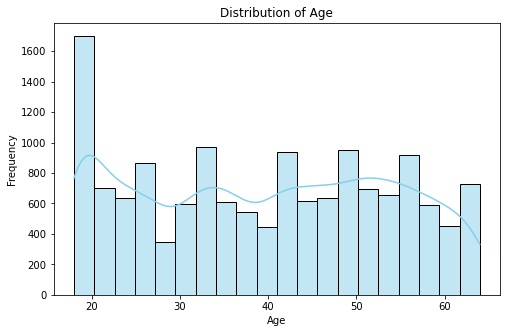

In [15]:
# Visualize the distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

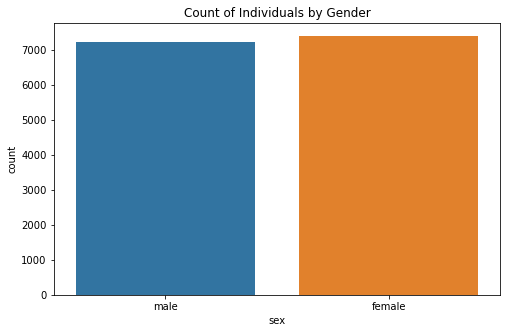

In [16]:
# Other visualizations and analysis based on your specific needs

#countplot for categorical variables like 'sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df)
plt.title('Count of Individuals by Gender')
plt.show()

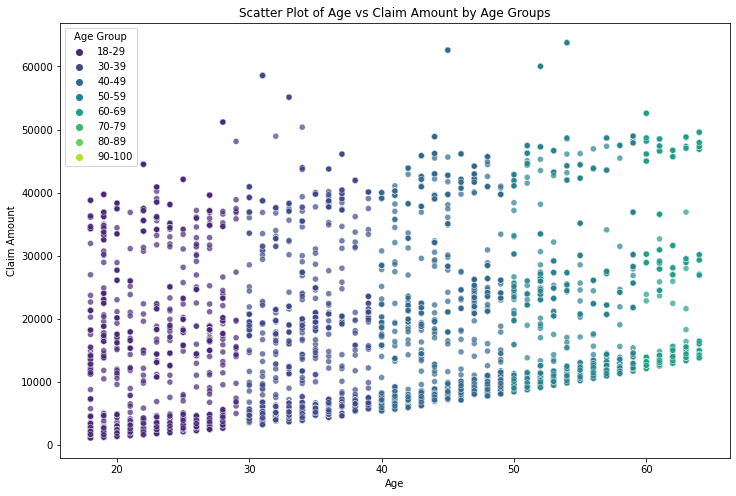

In [17]:
# Scatter plot for age groups having claims
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='claim', hue='age_group', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs Claim Amount by Age Groups')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.legend(title='Age Group')
plt.show()


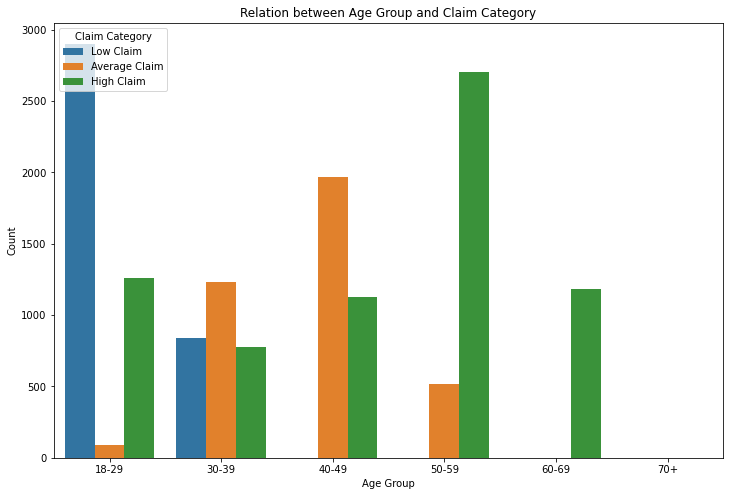

In [18]:
# Set the order for age groups and claim categories
age_group_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
claim_category_order = ['Low Claim', 'Average Claim', 'High Claim']


#overlapped and clustered bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Claim_Category', order=age_group_order, hue_order=claim_category_order, data=df, dodge=True)
plt.title('Relation between Age Group and Claim Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Claim Category')
plt.show()


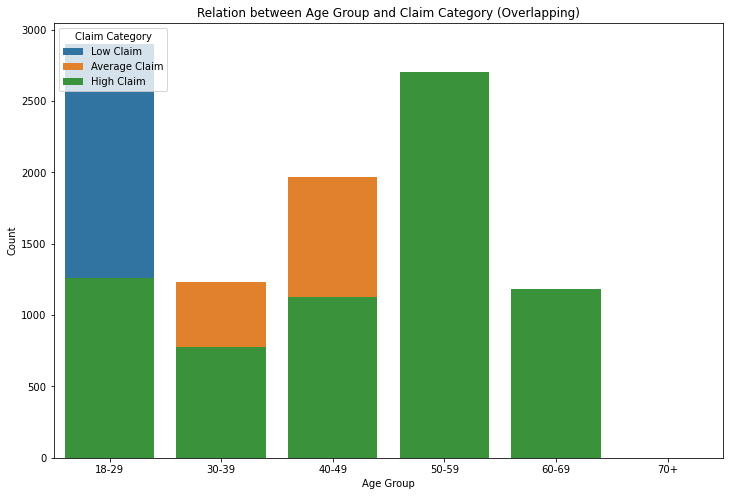

In [19]:
# Set the order for age groups and claim categories
age_group_order = ['18-29', '30-39', '40-49', '50-59', '60-69' , '70+']
claim_category_order = ['Low Claim', 'Average Claim', 'High Claim']

#bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Claim_Category', order=age_group_order, hue_order=claim_category_order, data=df, dodge=False)
plt.title('Relation between Age Group and Claim Category (Overlapping)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Claim Category')
plt.show()

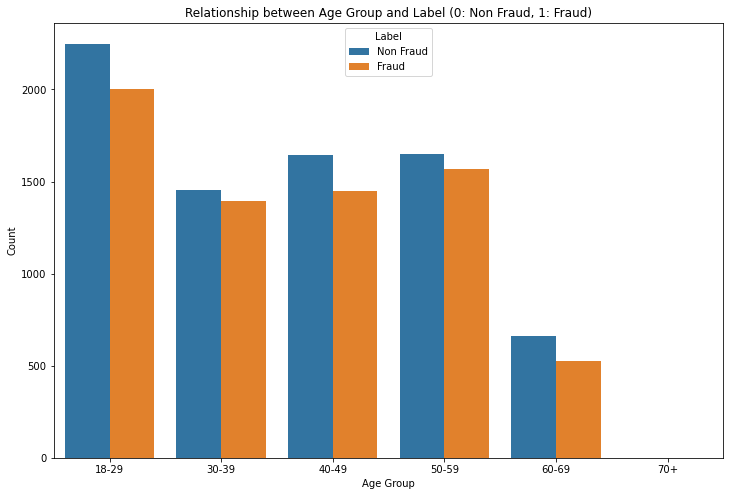

In [20]:
# bar chart for the relationship between 'age_group' and 'Label'
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', hue='Label', order=age_group_order, data=df)
plt.title('Relationship between Age Group and Label (0: Non Fraud, 1: Fraud)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Non Fraud', 'Fraud'])
plt.show()